In [1]:
#Bring in modules to use for this project
import pandas as pd

from matplotlib.animation import FuncAnimation
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [2]:
#Read in the CSV file for the locations to be plotted to
ASOS_Locations = pd.read_csv(r'/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/'
                             'Urban_Heat_Island/ASOS_Locations.csv')


In [8]:
#Subset data from the CSV file for later use
#lat = ASOS_Locations
#lon =ASOS_Locations['LONGITUDE']
#Locations = ASOS_Locations['CALL_SIGN']


In [2]:
shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/Boundaries_City/geo_export_eb3e4dfa-d26a-4ead-aeb2-65290ffa2039.shp'
cat_shp = shpreader.Reader(shapefile)

#Lincoln Institute of Land Policy - Earthworks
shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/Metro_Area1/rj676cg9479.shp'
Metro_Area = shpreader.Reader(shapefile)

shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/s_11au16/s_11au16.shp'
US_States = shpreader.Reader(shapefile)

shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/hydro_p_LakeMichigan/hydro_p_LakeMichigan.shp'
Lake_Michigan = shpreader.Reader(shapefile)

NameError: name 'lon' is not defined

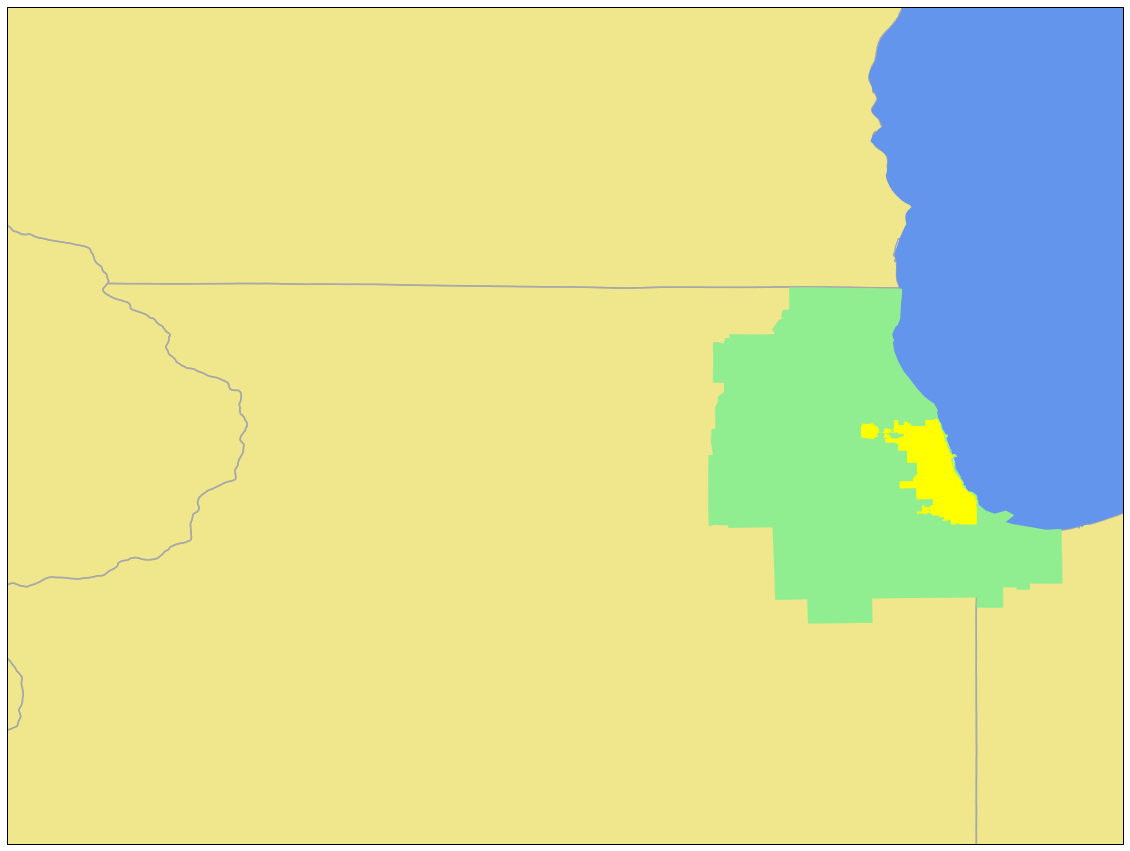

In [3]:
#Begin to create the map
fig = plt.figure(figsize=(20, 16))
ax = plt.axes(projection=ccrs.PlateCarree())

#Set the axis of the map
xlim = (-91,  -87)
ylim = (40.5,  43.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#Create and add the shapefiles to the map
for cat in US_States.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='khaki')

for cat in US_States.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='none', edgecolor='darkgray' , linewidth=1.5)

for cat in Lake_Michigan.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), edgecolor='b', color='cornflowerblue' , linewidth=0,)

for cat in Metro_Area.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='lightgreen', linewidth=0)
    
for cat in cat_shp.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='yellow', linewidth=0)


#Add the points form the CSV file to the map
plt.scatter(lon, lat, transform=ccrs.PlateCarree(), label=Locations, linewidth=1, color='firebrick', zorder=5)
plt.axis(aspect='equal')


# Create a custom legend
ax.legend(handles=[Patch(facecolor='Yellow', edgecolor='none', label='Urban'),
                   Patch(facecolor='lightgreen', edgecolor='none', label='Suburb' ),
                   Patch(facecolor='Khaki', edgecolor='none',label='Rural')],
                   loc='upper right', title='Community Type', title_fontsize= 'xx-large', handlelength=3, fontsize='x-large')


#Label each point on the map with station identfier
for i in range(39):
    ax.annotate(Locations[i], (lon[i]+0.02,lat[i]+0.01), zorder=5)

#Make a title
ax.set_title('Community Types and ASOS Locations Related to Chicago', y=0.95, fontsize='xx-large')

#plt.savefig(f'Chicago_ASOS.png', bbox_inches='tight')
plt.show()
